In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [179]:
df = pd.read_csv("Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [180]:
df.shape

(13320, 9)

In [181]:
df = df.drop(["area_type","availability","balcony","society"],axis="columns")

In [182]:
df.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [183]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [185]:
for col in df.select_dtypes(include="object").columns:
    mode_value = df[col].mode()[0]   # ✅ correct
    df[col].fillna(mode_value, inplace=True)


C:\Users\vikas\AppData\Local\Temp\ipykernel_12280\1344967700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [186]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
df[["bath"]] = imputer.fit_transform(df[["bath"]])


In [187]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [188]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(' ')[0]))


In [189]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [190]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [191]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [192]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [193]:
df[-df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [194]:
def convert_sqft_to_num(x):
    try:
        # Case 1: if it's just a number
        return float(x)
    except:
        # Case 2: if it's a range like "2100 - 2850"
        if "-" in str(x):
            tokens = x.split("-")
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
            return None
        # Case 3: if it's something like "34.46Sq. Meter" → skip/None
        return None


In [195]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [196]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"] 
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [197]:
len(df["location"].unique())

1305

In [198]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby("location")["location"].agg("count").sort_values(ascending=False)

location_stats

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
sapthagiri Layout          1
sarjapura main road        1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1294, dtype: int64

In [199]:
len(location_stats[location_stats<=10])

1053

In [200]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Gunjur Palya             10
Sadashiva Nagar          10
Basapura                 10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
sapthagiri Layout         1
sarjapura main road       1
kamanahalli main road     1
kanakapura main road      1
kanakapura road           1
Name: location, Length: 1053, dtype: int64

In [201]:
df.location = df.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [202]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [203]:
df[df.total_sqft/df.bhk<100].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571


In [204]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [205]:
df.shape

(13320, 7)

In [206]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12576, 7)

In [207]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

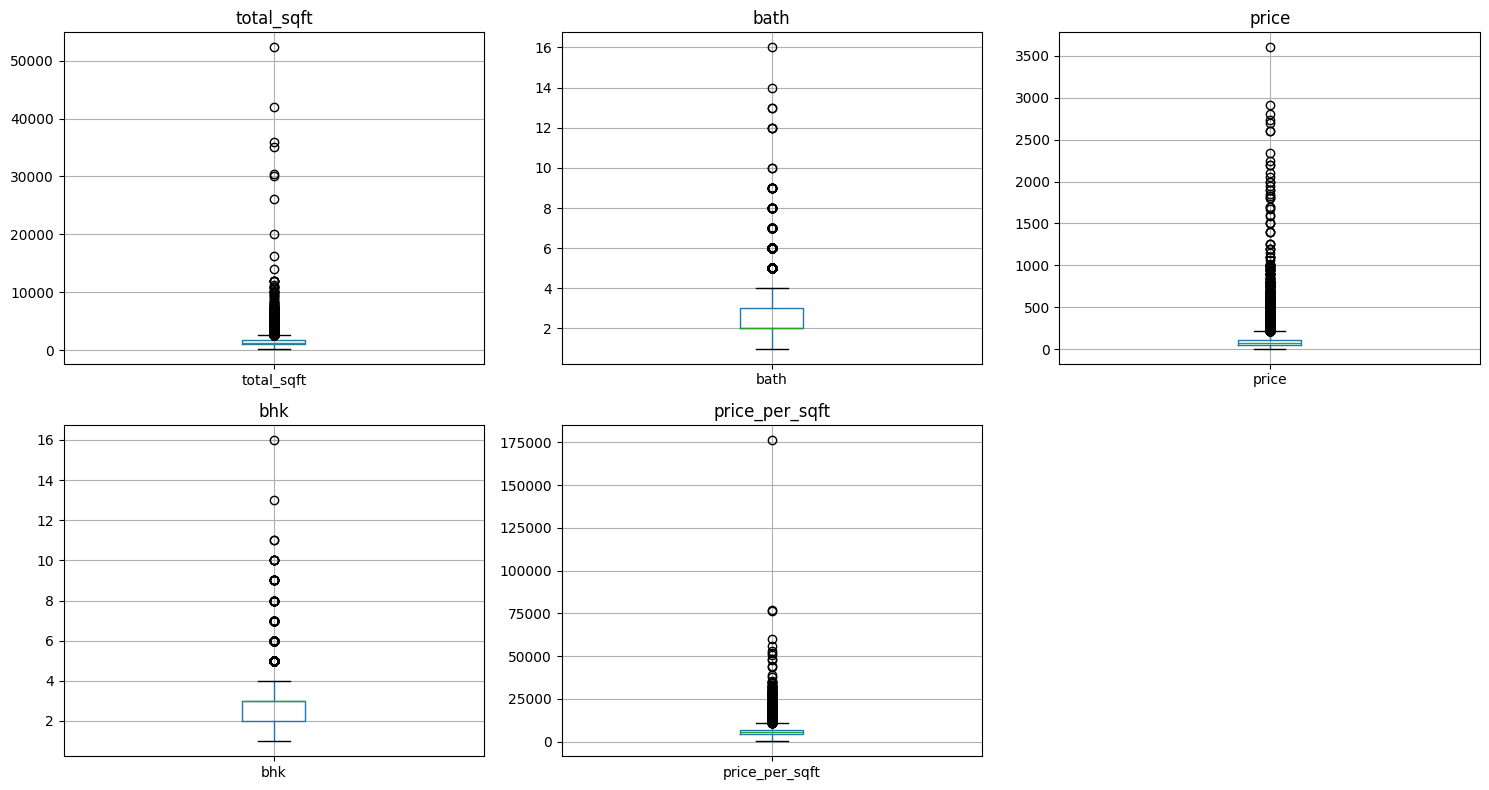

In [208]:

# List of columns to plot
cols = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]

# Create subplots
plt.figure(figsize=(15,8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 cols grid
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()


In [215]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft < (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df)
df2.shape



(8302, 7)

In [226]:
df2.price_per_sqft.describe()

count     8302.000000
mean      5191.390959
std       1260.876935
min       2090.909091
25%       4284.323272
50%       5031.864271
75%       5985.695971
max      10869.565217
Name: price_per_sqft, dtype: float64

In [227]:
df2.shape

(8302, 7)

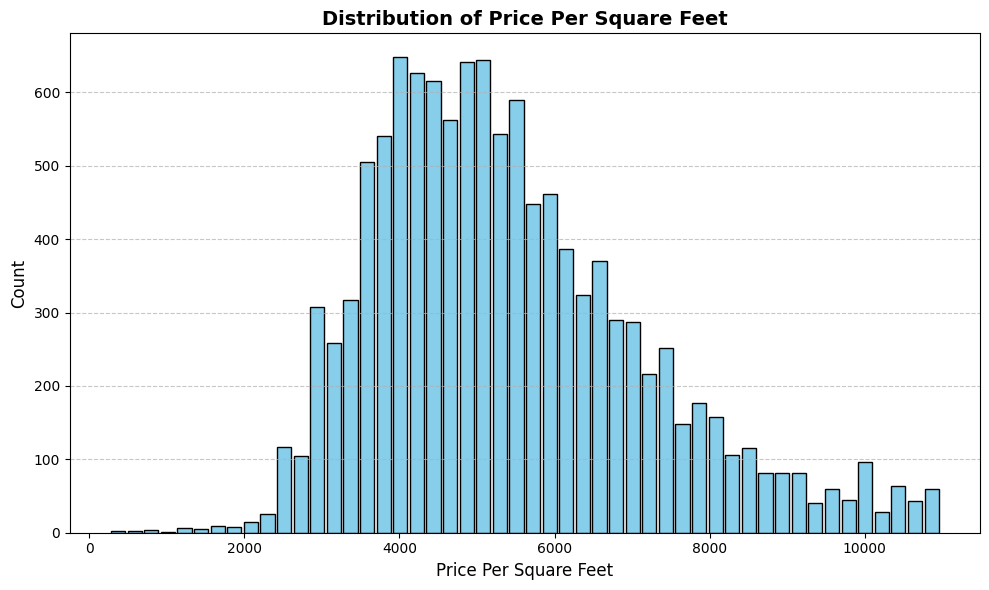

In [228]:

plt.figure(figsize=(10,6))
plt.hist(df["price_per_sqft"], bins=50, rwidth=0.85, color="skyblue", edgecolor="black")

plt.xlabel("Price Per Square Feet", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Price Per Square Feet", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [231]:
df2.bath.unique()

array([ 3.,  4.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 12., 16., 13.])

<function matplotlib.pyplot.show(close=None, block=None)>

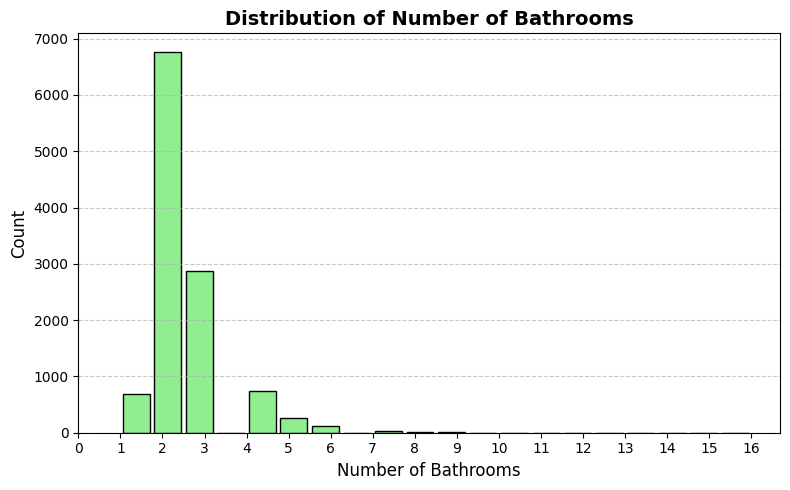

In [232]:
plt.figure(figsize=(8,5))
plt.hist(df["bath"], bins=20, rwidth=0.85, color="lightgreen", edgecolor="black")

plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Number of Bathrooms", fontsize=14, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(0, int(df["bath"].max())+1))  # show integer ticks only
plt.tight_layout()
plt.show